# Titanic survial Prediction from Kaggle
**Aim**:  use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

[data: https://www.kaggle.com/c/titanic/data]

In [60]:
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,validation_curve,cross_val_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [61]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing 

1) Remove Name and Ticket column, we can use PassengerId from here forth

2) Convert Category columns into labels

3) Missing values 

In [62]:
#removing columns 
columns_to_drop = ['Name','Ticket']
data.drop(labels = columns_to_drop, axis =1, inplace =True)

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [63]:
#checking on category columns
category_columns = ['Pclass','Sex','Embarked']

for col in category_columns:
    print(data[col].value_counts())
#NOTE: Cabin is a special column.
map1 = {'male':1,'female':2}
map2 = {'S':1,'C':2,'Q':3}

#Pclass is already in numerical
data['Sex'].replace(map1,inplace=True)
data['Embarked'].replace(map2, inplace=True)

3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [64]:
#safe to remove Cabin, since 77% of the data is missing
#for Age, we can set the mean as filler for missing rows and for Embarked, we can remove those rows

data['Age'].fillna(np.mean(data['Age']), inplace= True)
#data['Embarked'].dropna(inplace=True)

data = data[data['Embarked'].isnull()!=True]
data.drop('Cabin', axis=1, inplace=True)

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [65]:
pd.DataFrame({'missing_count':data.isnull().sum(),'missing_percentage':data.isnull().sum()/len(data)*100})

,missing_count,missing_percentage
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


# Data Visualization

Set target variable and check out how the distribution is for all columns


In [66]:
target = 'Survived'
data.set_index('PassengerId', inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1.0
2,1,1,2,38.0,1,0,71.2833,2.0
3,1,3,2,26.0,0,0,7.9250,1.0
4,1,1,2,35.0,1,0,53.1000,1.0
5,0,3,1,35.0,0,0,8.0500,1.0


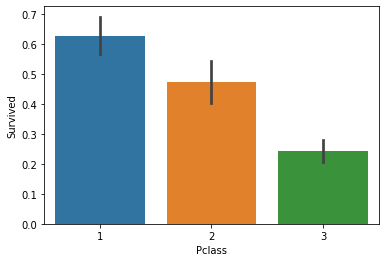

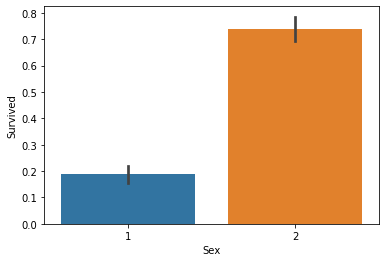

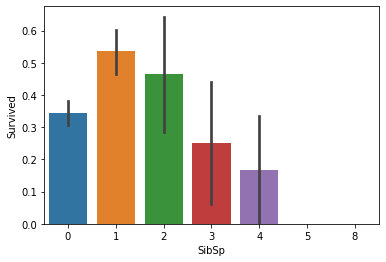

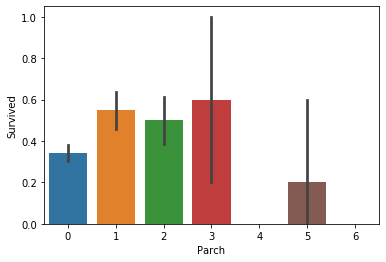

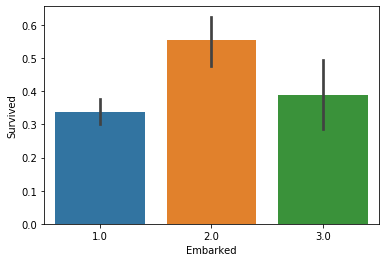

In [78]:
features = ['Pclass','Sex','SibSp','Parch','Embarked']
t_feature = ['Age','Fare']
plt.figure()
for col in features:
    sns.barplot(data=data, x=col, y='Survived')
    plt.show()
    

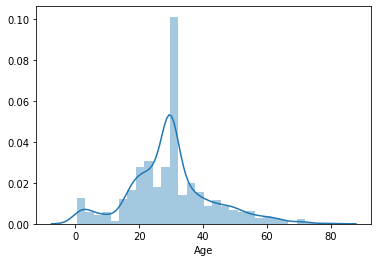

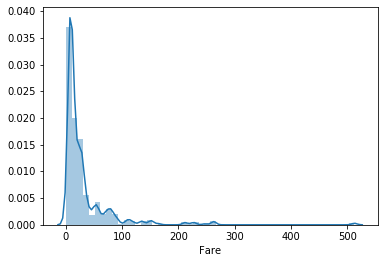

In [89]:
#cool, so we can normaliza these two 
for col in t_feature:
    sns.distplot(data[col])
    #sns.distplot(data['Survived'])
    plt.show()

# Build model and Predict

In [92]:
#starting with a Logistic Regression model
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data[features+t_feature], data[target], random_state=42, test_size=0.2)
X_train.shape, y_test.shape

((711, 7), (178,))

In [100]:
model = LogisticRegression(n_jobs=10, random_state=22).fit(X_train, y_train)
model #maybe later we can try GridSearch for parameter tuning

C:\Users\mscra\.conda\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=10, penalty='l2', random_state=22,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

# Evaluate model

In [101]:
y_pred = model.predict(X_test)

print('MSE : ', mean_squared_error(y_test, y_pred))
print('Accuracy : ',accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

MSE :  0.21348314606741572
Accuracy :  0.7865168539325843


array([[87, 22],
       [16, 53]], dtype=int64)

# Pickle model and Use it to make predictions for the test.csv from Kaggle

[NOTE : Need to maintain the format!]

In [103]:
from sklearn.externals import joblib

joblib.dump(model,'saved_model1.pkl')
saved_model = joblib.load('saved_model1.pkl')
saved_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=10, penalty='l2', random_state=22,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [109]:
#preprocess test data
test_data =pd.read_csv('test.csv')

#setting index
test_data.set_index('PassengerId', inplace=True)

#dropping columns
test_data.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)

#categorizing
test_data['Sex'].replace(map1,inplace=True)
test_data['Embarked'].replace(map2, inplace=True)

#set missing values of Age
test_data['Age'].fillna(np.mean(test_data['Age']), inplace= True)
test_data['Embarked'].fillna('ffill', inplace=True)
test_data['Fare'].fillna(np.mean(test_data['Fare']),inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,3
893,3,2,47.0,1,0,7.0000,1
894,2,1,62.0,0,0,9.6875,3
895,3,1,27.0,0,0,8.6625,1
896,3,2,22.0,1,1,12.2875,1


In [117]:
predictions = saved_model.predict(test_data)
result = pd.DataFrame({'PassengerId':test_data.index, 'Survived':predictions})
result.to_csv('submission.csv', index=False)

In [118]:
result.shape

(418, 2)

In [119]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
